In [207]:
import pandas as pd
import math
from fuzzywuzzy import fuzz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import glob

import warnings
warnings.filterwarnings("ignore")



# 检查

# Data Perparation

In [208]:
f1 = '/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP/cleaned_data/SPGlobal_general_info.xlsx'


In [209]:
main = pd.read_excel(f1)

print('------------'*5, '\n示例')
main.head()
print('------------'*5,'\nDataFrame大小')
print(main.shape)


------------------------------------------------------------ 
示例


,prop_name,prop_id,prop_id.1,prop_name.1,also_known_as,primary_commodity,dev_stage,actv_status,yr_source_date,mo_source_date,mo_yr_source_date,mine_type1,mine_type2,mine_type3,commodities_list
0,Chihuahua Refinery,86959,86959,Chihuahua Refinery,NaN,Lead,Operating,Active,2020.0,2.0,02/2020,NaN,NaN,NaN,Lead
1,101,64665,64665,101,NaN,Coal,Operating,NaN,2011.0,12.0,12/2011,NaN,NaN,NaN,Coal
2,1068,79522,79522,1068,NaN,Gold,Exploration,Active,2020.0,10.0,10/2020,NaN,NaN,NaN,"Gold,Copper,Molybdenum"
3,10th of Ramadan Refinery,86452,86452,10th of Ramadan Refinery,NaN,Lead,Operating,Active,2021.0,2.0,02/2021,NaN,NaN,NaN,Lead
4,10th of Ramadan Smelter,86451,86451,10th of Ramadan Smelter,NaN,Lead,Operating,Active,2021.0,2.0,02/2021,NaN,NaN,NaN,Lead


------------------------------------------------------------ 
DataFrame大小
(39135, 15)


In [2]:
Australia
Brazil
Canada
Colombia
Cote dIvoire
Cuba
Finland
France
Indonesia
Madagascar
Papua New Guinea
Philippines
Solomon Islands
South Africa
Tanzania
United States
Zimbabw

{'Australia',
 'AustraliaCanadaAustralia',
 'Brazil',
 'Canada',
 'Colombia',
 'Cote dIvoire',
 'Cuba',
 'Finland',
 'France',
 'Indonesia',
 'Madagascar',
 'Papua New Guinea',
 'Philippines',
 'Solomon Islands',
 'South Africa',
 'South AfricaSouth Africa',
 'Tanzania',
 'United States',
 'United StatesAustralia',
 'Zimbabwe'}

In [210]:
output_path = '/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP/cleaned_data/'
files = glob.glob(output_path + '*.xlsx')
dic = []

print('------------'*5, '\n Loading data')
for f in files:
    section = f.split('cleaned_data/SPGlobal_')[-1].split('.xlsx')[0]
#     print(section)
    if f!='/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP_metal_and_mining_database/cleaned_data/SPGlobal_general_info.xlsx':
        temp = pd.read_excel(f)
        dic += [(section, i) for i in temp.columns]
        main = pd.merge(main, temp, how='left')


------------------------------------------------------------ 
 Loading data


In [183]:
main.columns = \
['prop_name',
 'prop_id',
 'prop_id.1_x',
 'prop_name.1_x',
 'also_known_as_x',
 'primary_commodity',
 'dev_stage_x',
 'actv_status_x',
 'yr_source_date_x',
 'mo_source_date_x',
 'mo_yr_source_date_x',
 'mine_type1_x',
 'mine_type2_x',
 'mine_type3_x',
 'commodities_list_x',
 'interval_grade_g_per_tonne',
 'grade_x_interval_g_per_tonne',
 'interval_grade_equiv_g_per_tonne',
 'grade_equiv_x_interval_g_per_tonne',
 'interval_grade_pct',
 'grade_x_interval_pct',
 'interval_grade_equiv_pct',
 'grade_equiv_x_interval_pct',
 'interval_grade_ppm',
 'grade_x_interval_ppm',
 'interval_grade_equiv_ppm',
 'grade_equiv_x_interval_ppm',
 'millhead_grade_g_per_tonne',
 'millhead_grade_g_per_cubic_m',
 'millhead_grade_pct',
 'millhead_grade_ct_per_tonne',
 'millhead_grade_ct_per_cubic_m',
 'recov_rate',
 'production_capacity_oz',
 'production_capacity_tonne',
 'production_capacity_lb',
 'production_capacity_ct',
 'primary_commodity_y',
 'r_and_r_as_of',
 'resv_ore_tonnage',
 'meas_ind_ore_tonnage',
 'inf_resrc_ore_tonnage',
 'total_resrc_ore_tonnage',
 'r_and_r_ore_tonnage',
 'meas_ind_ore_tonnage_incl_resv',
 'royalty_name',
 'royalty_snl_instn_key',
 'royalty_type',
 'royalty_pct',
 'royalty_holder_hq',
 'royalty_holder_country',
 'royalty_holder_global_region',
 'royalty_holder_phone',
 'royalty_holder_website',
 'amt_capital_invested',
 'capital_cost_announced_date',
 'capital_cost_proj_completion_date',
 'capital_cost_completion_date',
 'capital_cost_type',
 'capital_cost_comments',
 'capital_improvement_yr',
 'operator_name',
 'operator_snl_instn_key',
 'operator_common_name',
 'operator_company_name_abbrev',
 'operator_date_closing_price',
 'operator_mkt_cap',
 'operator_price_to_ltm_eps',
 'operator_tev',
 'num_royalty_owners',
 'owner_list',
 'num_royalty_holders',
 'royalty_holder_list',
 'primary_commodity_x',
 'start_up_yr',
 'start_up_calendar_qtr',
 'proj_start_up_yr',
 'proj_start_up_qtr',
 'actual_closure_yr',
 'actual_closure_qtr',
 'proj_closure_yr',
 'proj_closure_qtr',
 'mill_capacity_tonnes_per_day',
 'mill_capacity_tonnes_per_year',
 'mill_capacity_cubic_m_per_day',
 'mill_capacity_cubic_m_per_year',
 'coal_uses',
 'economic_coal_seam_count',
 'total_coal_seam_count',
 'transport_method_coal_details',
 'shipping_port_coal_detail',
 'coal_seam',
 'coal_rank',
 'coal_rank_abbrev',
 'coal_group',
 'transport_method_coal_transport',
 'shipping_port_coal_transport',
 'export',
 'dom',
 'general_comments',
 'full_work_history',
 'enviro_comments',
 'subcontractors',
 'jv',
 'deal_pct_acquired_announcement',
 'deal_pct_acquired_completion',
 'total_deal_value_announcement',
 'total_deal_value_completion',
 'rptd_currency_code',
 'buyer',
 'buyer_country',
 'seller',
 'seller_country',
 'global_rank_by_commodity',
 'global_production_value_by_commodity',
 'share_of_world_by_commodity',
 'actual_estimate_forecast',
 'as_of_date',
 'global_rank_all_commodities',
 'global_production_value_all_commodities',
 'share_of_world_all_commodities',
 'owner_name',
 'current_owner_common_name',
 'current_owner_company_name_abbrev',
 'owner_type',
 'owner_pct',
 'current_controlling_own_pct',
 'owner_hq',
 'owner_city_state',
 'owner_location',
 'owner_frgn_province',
 'owner_country',
 'owner_global_region',
 'interval_id',
 'hole_id',
 'date_rptd',
 'rptd_by',
 'interval',
 'depth',
 'explor_purpose',
 'significant_interval',
 'primary_interval_commodity',
 'interval_commodities',
 'interval_value',
 'zone_name',
 'geology_region',
 'geology_comments',
 'avg_depth_geologic_dep',
 'geologic_ore_body_type',
 'ore_minerals',
 'prop_id.1_y',
 'prop_name.1_y',
 'also_known_as_y',
 'primary_commodity_y',
 'dev_stage_y',
 'actv_status_y',
 'yr_source_date_y',
 'mo_source_date_y',
 'mo_yr_source_date_y',
 'mine_type1_y',
 'mine_type2_y',
 'mine_type3_y',
 'commodities_list_y',
 'grd_resv_g_per_tonne',
 'contained_resv_oz_g_per_tonne',
 'grd_meas_ind_g_per_tonne',
 'contained_meas_ind_oz_g_per_tonne',
 'grd_inf_g_per_tonne',
 'contained_inf_oz_g_per_tonne',
 'grd_total_resrc_g_per_tonne',
 'contained_total_resrc_oz_g_per_tonne',
 'grd_r_and_r_g_per_tonne',
 'contained_r_and_r_oz_g_per_tonne',
 'grd_meas_ind_incl_resv_g_per_tonne',
 'contained_meas_ind_incl_resv_oz_g_per_tonne',
 'contractor_id',
 'contractor_name',
 'contractor_hq',
 'begin_yr',
 'begin_mo',
 'end_yr',
 'end_mo',
 'proj_end_yr',
 'proj_end_mo',
 'contractor_last_verified',
 'as_of_date_production',
 'mining_processing_cost_per_tonne_by_period',
 'mining_processing_cost_per_cubic_m_by_period',
 'production_cost_comments_by_period',
 'ore_processed_mass_by_period',
 'ore_processed_volume_by_period',
 'mining_production_general_comments_by_period',
 'forecast_date',
 'actual_estimate_forecast_production',
 'historical_owner_name',
 'historical_owner_common_name',
 'historical_owner_company_name_abbrev',
 'historical_owner_type',
 'historical_equity_own_pct',
 'historical_controlling_own_pct',
 'historical_owner_hq',
 'historical_owner_city_state',
 'historical_owner_state',
 'historical_owner_location',
 'historical_owner_frgn_province',
 'historical_owner_country',
 'historical_owner_global_region',
 'buyer_name_target_name',
 'deal_type',
 'target',
 'target_country',
 'announce_date',
 'deal_status',
 'completion_termination_date',
 'deal_consideration',
 'earn_in',
 'state_province',
 'country_name',
 'snl_global_region',
 'latitude',
 'longitude',
 'coordinate_accuracy',
 'distance_from',
 'location_comments',
 'locale',
 'district',
 'country/region_pol_risk',
 'country/region_op_risk',
 'country/region_sec_risk',
 'country/region_ter_risk',
 'description_claim',
 'operator_tev_to_ltm_ebitda',
 'operator_total_debt_to_total_cap',
 'operator_price_to_earn_after_extra',
 'operator_tev_to_ebitda',
 'operator_period_ended',
 'operator_working_capital',
 'operator_total_cap_at_bv',
 'operator_total_debt',
 'operator_current_liab',
 'stripping_ratio',
 'waste_to_ore_ratio',
 'mining_methods',
 'processing_methods',
 'production_forms',
 'mining_processing_cost_per_metric_tonne',
 'mining_processing_cost_per_cubic_m',
 'cash_cost_per_oz',
 'cash_cost_per_tonne',
 'cash_cost_per_lb',
 'cash_cost_per_ct',
 'total_production_cost_per_oz',
 'total_production_cost_per_tonne',
 'total_production_cost_per_lb',
 'total_production_cost_per_ct',
 'all_in_sustaining_cost_per_oz',
 'all_in_sustaining_cost_per_tonne',
 'all_in_sustaining_cost_per_lb',
 'all_in_sustaining_cost_per_ct']

In [185]:
main[(main['primary_commodity']=='Nickel')&(main['country_name']=="USA")].T

,1748,3937,4348,9585,10866,11858,12149,12184,16148,16794,17600,19963,21107,22281,22309,22656,22720,23390,24720,24779,25451,25623,27164,27575,30758,32221,33032,33224,33727,34038,34533,34840
prop_name,A-Train,Bohemia Basin,Brady Glacier,Eagle,Farewell,Gasquet Mountain,Giroux,Glenbrook,Judy Claims,Katahdin,Knox,LM,MAN,Michigan,Mid-Continent,Minnesota,Mirror Harbor,Mount Peavine,Nickel Mountain,Nikolai,Nye Basin,Okanogan,Pine Flat,Port Refinery,Sawyer Camp,Snipe Bay,Stone Corral,Sumas Mountain,Tamarack,Taylor Creek,Timberwolf,Tonsina
prop_id,55144,58254,24448,33795,63770,25045,84846,24753,25145,58288,27263,70621,32184,56831,59687,56833,24453,25144,58311,65992,58313,60395,24546,64732,87959,24456,25230,29931,36221,24874,66804,53233
prop_id.1_x,55144,58254,24448,33795,63770,25045,84846,24753,25145,58288,27263,70621,32184,56831,59687,56833,24453,25144,58311,65992,58313,60395,24546,64732,87959,24456,25230,29931,36221,24874,66804,53233
prop_name.1_x,A-Train,Bohemia Basin,Brady Glacier,Eagle,Farewell,Gasquet Mountain,Giroux,Glenbrook,Judy Claims,Katahdin,Knox,LM,MAN,Michigan,Mid-Continent,Minnesota,Mirror Harbor,Mount Peavine,Nickel Mountain,Nikolai,Nye Basin,Okanogan,Pine Flat,Port Refinery,Sawyer Camp,Snipe Bay,Stone Corral,Sumas Mountain,Tamarack,Taylor Creek,Timberwolf,Tonsina
also_known_as_x,NaN,NaN,Nunatak,"Eagle East, Humboldt Mill, Kennecott Eagle, Sa...","Bowser Creek, Bowser Creek Headwaters, Bowser ...",NaN,NaN,"NICKEL MOUNTAIN, RIDDLE",NaN,NaN,UNION NICKEL,Loosemore,"Alpha Intrusive, Broxson, Canwell, Canwell Wes...","Bangston Lake, Baraga Basin, Kiernan Sills",NaN,Water Hen,"ALASKA NICKEL MINES, JUNEAU SEA LEVEL COPPER M...",NaN,NaN,NaN,NaN,NaN,"DIAMOND FLAT, PINE FLAT BENCH, PINE FLAT MOUNTAIN",NaN,NaN,"1000, 900, 976, 998, BARANOF TRUST, SNIPE 1096...",NaN,NaN,"138 Zone, 142 Zone, 164 Zone, 221 Zone, 264 Zo...",NaN,NaN,S.E. Property
primary_commodity,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel,Nickel
dev_stage_x,Exploration,Advanced Exploration,Reserves Development,Operating,Target Outline,Feasibility Complete,Exploration,Closed,Exploration,Advanced Exploration,Closed,Exploration,Target Outline,Exploration,Exploration,Grassroots,Target Outline,Exploration,Closed,Exploration,NaN,Grassroots,Feasibility,Closed,Target Outline,NaN,Reserves Development,Reserves Development,Prefeas/Scoping,Target Outline,Grassroots,Grassroots
actv_status_x,Inactive,Inactive,Inactive,Active,Active,Inactive,Active,Inactive,Inactive,Inactive,Inactive,Active,Active,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Active,Inactive,Inactive,Inactive,Active,Inactive,Active,Inactive
yr_source_date_x,2007.0,2008.0,1989.0,2021.0,2018.0,1992.0,2020.0,1998.0,1989.0,2008.0,2016.0,2020.0,2020.0,2013.0,2013.0,2013.0,1989.0,1980.0,2008.0,2013.0,2008.0,2007.0,2010.0,NaN,2021.0,1989.0,1989.0,1996.0,2021.0,1989.0,2015.0,2013.0
mo_source_date_x,8.0,8.0,8.0,9.0,9.0,11.0,9.0,1.0,7.0,9.0,3.0,8.0,1.0,4.0,7.0,4.0,8.0,NaN,9.0,10.0,9.0,8.0,2.0,NaN,10.0,7.0,7.0,10.0,9.0,7.0,2.0,6.0


In [189]:
name = 'Turnagain'
main[(main['prop_name'].str.contains(name))|(main['also_known_as_x'].str.contains(name))].T

,35428,35429
prop_name,Turnagain,Turnagain River
prop_id,30825,57431
prop_id.1_x,30825,57431
prop_name.1_x,Turnagain,Turnagain River
also_known_as_x,"Attic, Bear, Cliff Zone, Cub, Dease Lime, Dina...",NaN
primary_commodity,Nickel,Diamonds
dev_stage_x,Prefeas/Scoping,Grassroots
actv_status_x,Active,Inactive
yr_source_date_x,2021.0,2012.0
mo_source_date_x,6.0,5.0


# Basic filter

In [543]:
nicle_mines_au_proccessed = pd.read_excel('nickel_mines_ma_imputed3.xlsx')

In [544]:
stat = nicle_mines_au_proccessed.groupby('country_name')[['resv_metal_tonnage (mt)', 'production (mt)']].sum()#.astype(int)


In [545]:
usgs_stat = pd.read_excel('USGS_nickel_by_country.xlsx', index_col='Unnamed: 0')
usgs_stat['Reserves_ratio'] = usgs_stat['Reserves'] / 94000000
# usgs_stat


In [546]:
stat = pd.concat([stat, usgs_stat], axis=1)

In [547]:
usgs_stat

,Production_2019,Production_2020e,Production_2019_ratio,Production_2020e_ratio,Reserves,Reserves_ratio
USA,13500,16000,0.005172,0.0064,100000,0.001064
Australia,159000,170000,0.060920,0.0680,20000000,0.212766
Brazil,60600,73000,0.023218,0.0292,16000000,0.170213
Canada,181000,150000,0.069349,0.0600,2800000,0.029787
China,120000,120000,0.045977,0.0480,2800000,0.029787
Cuba,49200,49000,0.018851,0.0196,5500000,0.058511
Dominican Republic,56900,47000,0.021801,0.0188,930000,0.009894
Indonesia,853000,760000,0.326820,0.3040,21000000,0.223404
New Caledonia,208000,200000,0.079693,0.0800,12000000,0.127660
Philippines,323000,320000,0.123755,0.1280,4800000,0.051064


In [548]:
16000.0 * 0.95

15200.0

In [549]:
(stat['resv_metal_tonnage (mt)'] / stat['Reserves']).dropna()

Australia             0.867348
Brazil                0.842462
Canada                2.005066
China                 1.064192
Cuba                  0.904189
Dominican Republic    0.913989
Indonesia             0.869343
New Caledonia         0.854075
Philippines           1.146787
Russia                1.080560
USA                   1.316000
dtype: float64

In [550]:
(stat['production (mt)'] / stat['Production_2020e']).dropna()

Australia             1.340976
Brazil                1.013699
Canada                1.116880
China                 1.068500
Cuba                  0.642980
Dominican Republic    0.800319
Indonesia             0.710961
New Caledonia         0.972700
Philippines           0.912450
Russia                1.022607
USA                   1.044875
dtype: float64

In [510]:
stat['resv_metal_tonnage (mt)'].sum() / 94000000
# 储量多了

1.1261940472023937

In [418]:
stat['production (mt)'].sum() / 2500000


0.8138612504

In [403]:
main['total_production_cost_per_tonne'].notnull().mean()

0.0

In [406]:
stat.loc['Cuba']

resv_metal_tonnage (mt)    8.430000e+06
production (mt)            3.150600e+04
p_r_ratio                  3.908933e-03
Production_2019            4.920000e+04
Production_2020e           4.900000e+04
Production_2019_ratio      1.885057e-02
Production_2020e_ratio     1.960000e-02
Reserves                   5.500000e+06
Reserves_ratio             5.851064e-02
Name: Cuba, dtype: float64

In [405]:
1.200000e+05 * 0.9

108000.0

In [479]:
df = pd.merge(main, nicle_mines_au_proccessed.dropna(subset=['resv_metal_tonnage (mt)']))

In [480]:
df['amt_capital_invested'].isnull().mean()

0.36428571428571427

In [481]:
df.columns.tolist()

['prop_name',
 'prop_id',
 'prop_id.1_x',
 'prop_name.1_x',
 'also_known_as_x',
 'primary_commodity_x',
 'dev_stage_x',
 'actv_status_x',
 'yr_source_date_x',
 'mo_source_date_x',
 'mo_yr_source_date_x',
 'mine_type1_x',
 'mine_type2_x',
 'mine_type3_x',
 'commodities_list_x',
 'interval_grade_g_per_tonne',
 'grade_x_interval_g_per_tonne',
 'interval_grade_equiv_g_per_tonne',
 'grade_equiv_x_interval_g_per_tonne',
 'interval_grade_pct',
 'grade_x_interval_pct',
 'interval_grade_equiv_pct',
 'grade_equiv_x_interval_pct',
 'interval_grade_ppm',
 'grade_x_interval_ppm',
 'interval_grade_equiv_ppm',
 'grade_equiv_x_interval_ppm',
 'millhead_grade_g_per_tonne',
 'millhead_grade_g_per_cubic_m',
 'millhead_grade_pct',
 'millhead_grade_ct_per_tonne',
 'millhead_grade_ct_per_cubic_m',
 'recov_rate',
 'production_capacity_oz',
 'production_capacity_tonne',
 'production_capacity_lb',
 'production_capacity_ct',
 'primary_commodity_y',
 'r_and_r_as_of',
 'resv_ore_tonnage',
 'meas_ind_ore_tonnage',

In [482]:
df['production_capacity_oz'].isnull().mean()

0.9857142857142858

In [483]:
df['amt_capital_invested']

0      1.010000e+04
1      8.500000e+04
2      5.500000e+06
3               NaN
4      4.430760e+05
5      5.867000e+04
6               NaN
7               NaN
8      1.900000e+06
9      3.590000e+04
10              NaN
11              NaN
12     8.600000e+04
13     1.600000e+06
14              NaN
15     6.802500e+04
16     7.065000e+05
17     2.350000e+04
18     2.340000e+05
19     2.500000e+05
20     2.600000e+06
21     4.000000e+05
22     1.658000e+06
23     1.390000e+05
24     6.000000e+04
25              NaN
26     2.260000e+04
27              NaN
28              NaN
29              NaN
30     1.018000e+06
31     7.700000e+05
32     6.140970e+05
33     1.950000e+05
34     7.000000e+05
35              NaN
36     2.000000e+04
37     2.250000e+05
38     1.160000e+06
39     4.300000e+06
40              NaN
41              NaN
42              NaN
43              NaN
44              NaN
45              NaN
46              NaN
47     1.960000e+04
48              NaN
49     6.766000e+04


In [484]:
df['mine_type1_x']

0         Open Pit
1         Open Pit
2         Open Pit
3         Open Pit
4         Open Pit
5      Underground
6         Open Pit
7         Open Pit
8         Open Pit
9      Underground
10             NaN
11             NaN
12     Underground
13        Open Pit
14        Open Pit
15        Open Pit
16        Open Pit
17     Underground
18        Open Pit
19        Open Pit
20        Open Pit
21        Open Pit
22        Open Pit
23     Underground
24        Open Pit
25        Open Pit
26     Underground
27             NaN
28             NaN
29             NaN
30        Open Pit
31     Underground
32     Underground
33        Open Pit
34        Open Pit
35        Open Pit
36     Underground
37     Underground
38        Open Pit
39        Open Pit
40        Open Pit
41        Open Pit
42        Open Pit
43     Underground
44             NaN
45     Underground
46     Underground
47        Open Pit
48        Open Pit
49     Underground
50        Open Pit
51        Open Pit
52        Op

In [485]:
df[df['production_capacity_oz'].notnull()][['resv_metal_tonnage (mt)', 'production_capacity_oz', 'mine_type1_x']]

,resv_metal_tonnage (mt),production_capacity_oz,mine_type1_x
32,113536.2,3900.0,Underground
68,711400.0,38500.0,Underground


In [487]:
df[['resv_metal_tonnage (mt)', 'grade (%)', 'production (mt)',
       'resource (milion mt)', 'resv_ore_tonnage (mt)', 'cash cost', 'remark',
       'general_comments_split', 'full_work_history_split',
       'description_claim_split']].isnull().mean()

resv_metal_tonnage (mt)    0.000000
grade (%)                  0.007143
production (mt)            0.614286
resource (milion mt)       0.892857
resv_ore_tonnage (mt)      0.128571
cash cost                  0.992857
remark                     0.842857
general_comments_split     0.014286
full_work_history_split    0.014286
description_claim_split    0.014286
dtype: float64

In [494]:
df.loc[df['production (mt)'].notnull(), 'dev_stage_x'] = 'Operating'
df.loc[df['production (mt)'].notnull(), 'actv_status_x'] = 'Active'


In [499]:
df['mining_production_general_comments_by_period']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80     NaN
81     NaN
82     NaN
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
90     NaN

In [500]:
df.isnull().mean().sort_values()

prop_name                                       0.000000
coordinate_accuracy                             0.000000
longitude                                       0.000000
latitude                                        0.000000
snl_global_region                               0.000000
country_name                                    0.000000
state_province                                  0.000000
commodities_list_y                              0.000000
mo_yr_source_date_y                             0.000000
mo_source_date_y                                0.000000
yr_source_date_y                                0.000000
dev_stage_y                                     0.000000
primary_commodity_y                             0.000000
prop_name.1_y                                   0.000000
prop_id.1_y                                     0.000000
general_comments                                0.000000
country/region_pol_risk                         0.000000
primary_commodity_x            

In [501]:
df['yr_source_date_y', 'grade (%)', 'num_royalty_owners']

0      2020.0
1      2017.0
2      2021.0
3      2017.0
4      2021.0
5      2017.0
6      2017.0
7      2017.0
8      2021.0
9      2021.0
10     2006.0
11     2018.0
12     2017.0
13     2021.0
14     2019.0
15     2021.0
16     2019.0
17     2021.0
18     2021.0
19     2020.0
20     2021.0
21     2021.0
22     2021.0
23     2018.0
24     2021.0
25     2016.0
26     2021.0
27     2018.0
28     2015.0
29     2020.0
30     2020.0
31     2021.0
32     2021.0
33     2015.0
34     2016.0
35     2008.0
36     2021.0
37     2016.0
38     2017.0
39     2021.0
40     2020.0
41     2021.0
42     2019.0
43     2014.0
44     2009.0
45     2019.0
46     2009.0
47     2021.0
48     2019.0
49     2009.0
50     2017.0
51     2021.0
52     2021.0
53     2021.0
54     2019.0
55     2008.0
56     2016.0
57     2007.0
58     2021.0
59     2021.0
60     2018.0
61     2019.0
62     2014.0
63     2020.0
64     2018.0
65     2010.0
66     2016.0
67     2000.0
68     2018.0
69     2016.0
70     2018.0
71    

In [3]:
"Emission  ALONG THE MINERAL SUPPLY CHAIN DO NOT NEGATE THE CLEAR CLIMATE ADVANTAGES OF CLEAN ENERGY TECHNOLOGIES.".lower()

'emission  along the mineral supply chain do not negate the clear climate advantages of clean energy technologies.'

In [490]:
df = pd.concat([df, pd.get_dummies(df['mine_type1_x'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Operating'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['snl_global_region'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['country_name'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['state_province'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['state_province'])], axis=1)


,prop_name,prop_id,prop_id.1_x,prop_name.1_x,also_known_as_x,primary_commodity_x,dev_stage_x,actv_status_x,yr_source_date_x,mo_source_date_x,mo_yr_source_date_x,mine_type1_x,mine_type2_x,mine_type3_x,commodities_list_x,interval_grade_g_per_tonne,grade_x_interval_g_per_tonne,interval_grade_equiv_g_per_tonne,grade_equiv_x_interval_g_per_tonne,interval_grade_pct,grade_x_interval_pct,interval_grade_equiv_pct,grade_equiv_x_interval_pct,interval_grade_ppm,grade_x_interval_ppm,interval_grade_equiv_ppm,grade_equiv_x_interval_ppm,millhead_grade_g_per_tonne,millhead_grade_g_per_cubic_m,millhead_grade_pct,millhead_grade_ct_per_tonne,millhead_grade_ct_per_cubic_m,recov_rate,production_capacity_oz,production_capacity_tonne,production_capacity_lb,production_capacity_ct,primary_commodity_y,r_and_r_as_of,resv_ore_tonnage,meas_ind_ore_tonnage,inf_resrc_ore_tonnage,total_resrc_ore_tonnage,r_and_r_ore_tonnage,meas_ind_ore_tonnage_incl_resv,royalty_name,royalty_snl_instn_key,royalty_type,royalty_pct,royalty_holder_hq,royalty_holder_country,royalty_holder_global_region,royalty_holder_phone,royalty_holder_website,amt_capital_invested,capital_cost_announced_date,capital_cost_proj_completion_date,capital_cost_completion_date,capital_cost_type,capital_cost_comments,capital_improvement_yr,operator_name,operator_snl_instn_key,operator_common_name,operator_company_name_abbrev,operator_date_closing_price,operator_mkt_cap,operator_price_to_ltm_eps,operator_tev,num_royalty_owners,owner_list,num_royalty_holders,royalty_holder_list,primary_commodity_x,start_up_yr,start_up_calendar_qtr,proj_start_up_yr,proj_start_up_qtr,actual_closure_yr,actual_closure_qtr,proj_closure_yr,proj_closure_qtr,mill_capacity_tonnes_per_day,mill_capacity_tonnes_per_year,mill_capacity_cubic_m_per_day,mill_capacity_cubic_m_per_year,coal_uses,economic_coal_seam_count,total_coal_seam_count,transport_method_coal_details,shipping_port_coal_detail,coal_seam,coal_rank,coal_rank_abbrev,coal_group,transport_method_coal_transport,shipping_port_coal_transport,export,dom,general_comments,...,begin_mo,end_yr,end_mo,proj_end_yr,proj_end_mo,contractor_last_verified,as_of_date_production,mining_processing_cost_per_tonne_by_period,mining_processing_cost_per_cubic_m_by_period,production_cost_comments_by_period,ore_processed_mass_by_period,ore_processed_volume_by_period,mining_production_general_comments_by_period,forecast_date,actual_estimate_forecast_production,historical_owner_name,historical_owner_common_name,historical_owner_company_name_abbrev,historical_owner_type,historical_equity_own_pct,historical_controlling_own_pct,historical_owner_hq,historical_owner_city_state,historical_owner_state,historical_owner_location,historical_owner_frgn_province,historical_owner_country,historical_owner_global_region,buyer_name_target_name,deal_type,target,target_country,announce_date,deal_status,completion_termination_date,deal_consideration,earn_in,state_province,country_name,snl_global_region,latitude,longitude,coordinate_accuracy,distance_from,location_comments,locale,district,country/region_pol_risk,country/region_op_risk,country/region_sec_risk,country/region_ter_risk,description_claim,operator_tev_to_ltm_ebitda,operator_total_debt_to_total_cap,operator_price_to_earn_after_extra,operator_tev_to_ebitda,operator_period_ended,operator_working_capital,operator_total_cap_at_bv,operator_total_debt,operator_current_liab,stripping_ratio,waste_to_ore_ratio,mining_methods,processing_methods,production_forms,mining_processing_cost_per_metric_tonne,mining_processing_cost_per_cubic_m,cash_cost_per_oz,cash_cost_per_tonne,cash_cost_per_lb,cash_cost_per_ct,total_production_cost_per_oz,total_production_cost_per_tonne,total_production_cost_per_lb,total_production_cost_per_ct,all_in_sustaining_cost_per_oz,all_in_sustaining_cost_per_tonne,all_in_sustaining_cost_per_lb,all_in_sustaining_cost_per_ct,also_known_as,importance,actv_status,dev_stage,yr_source_date,reserve_desc,grade_desc,production_desc,resv_metal_tonnage (mt),grade

In [263]:
0.297*113536.2**0.56 * 10**6 / 35274

5703.966645496229

In [264]:
0.297*711400.0**0.56 * 10**6 / 35274

15939.896635306748

https://minewiki.engineering.queensu.ca/mediawiki/index.php/Estimation_of_the_potential_production_rate
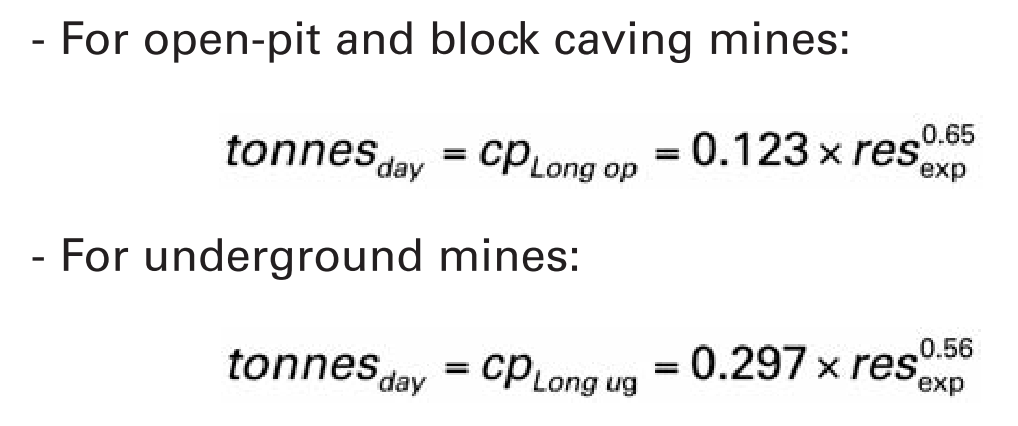